<hr style="height:.6px;color:#333;" />
<h1><b>Regression Model Development</b></h1>
<h2>Xitlali Magana</h2>
<br>
<hr style="height:.3px;color:#333;" />


In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file ='Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

The below code is performing data cleaning and preparation by addressing missing values and correcting column names. It starts by checking for missing values in the dataset using the .isnull().sum() method and calculates the percentage of missing values for each feature. As the missing values in the FAMILY_NAME feature only account for 2.36% of the total data, I decided to fill the missing values with "unsure". Since the feature data type is an object, this is a suitable method to fill the missing values. The code then checks if all the missing values have been filled by using the .isnull().sum() method again. Finally, the code checks the column names by using .columns and it identified that the feature LATE_DELIVERIES has an extra space. I renamed the column to remove the space and avoid any potential conflicts.

In [2]:
#Identifying how many missing values the data set contains.
mv = chef.isnull().sum() #count of null values

mv #missing values

#identifying if the missing values are below 5% per feature
chef.isnull().mean().round(4) 

# instantiating an imputation value
fill = "unsure"

# filling missing values
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values have been taken care of
chef.isnull().sum().sum()

# renaming the late deliveries column to remove the space
chef = chef.rename(columns={"LATE_DELIVERIES ":"LATE_DELIVERIES"})

The code is performing exploratory data analysis (EDA) on the cleaned and prepared data. The objective of this is to understand the distribution of the variables and identify any skewed or non-normal distributions that might affect the results of the analysis. To achieve this, the code creates histograms for all the variables in the dataset using matplotlib.

The reason for creating histograms is to visually inspect the distribution of the variables and determine if any of the features are skewed, meaning if the data deviates significantly from a normal distribution. This step is important because a skewed distribution can impact the reliability and validity of the analysis and results.

After creating the histograms, the code identifies that a few features need to be transformed to reduce their skewness. From prior knowledge, I decided to use the log transformation to achieve this. The log transformation can be used to normalize the distribution of a skewed feature, which can improve the performance of the analysis. The ultimate goal is to increase the R-squared value, which measures the goodness of fit of the regression model. A high R-squared value indicates that the model fits the data well and the independent variables are good predictors of the dependent variable, REVENUE.

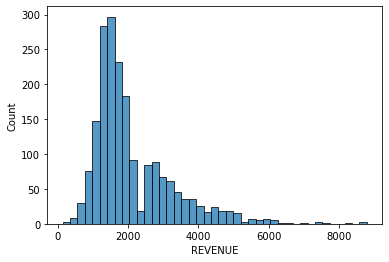

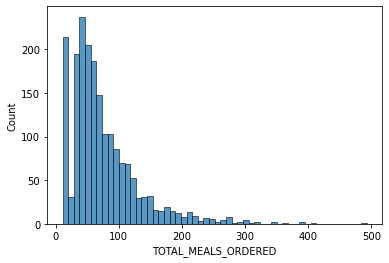

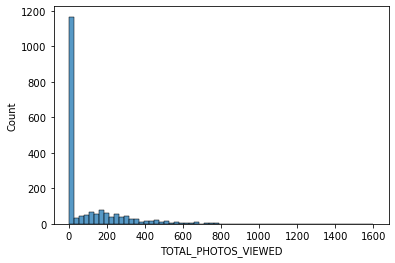

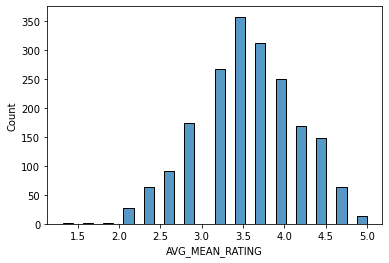

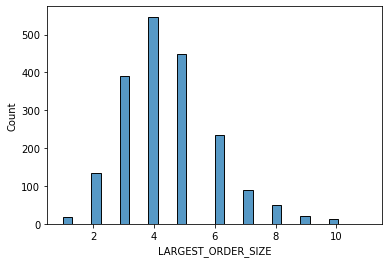

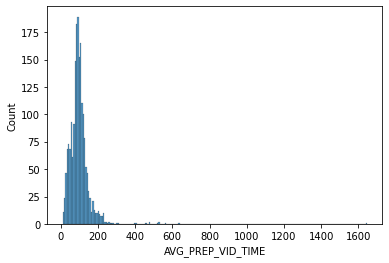

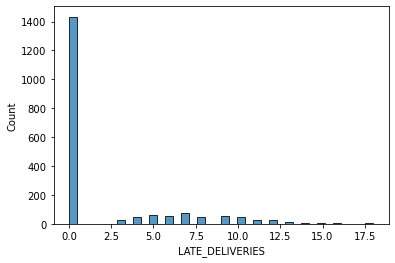

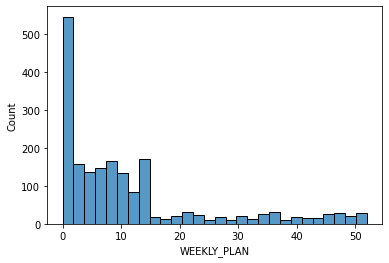

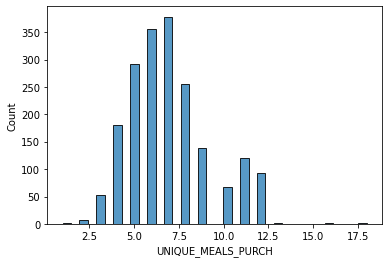

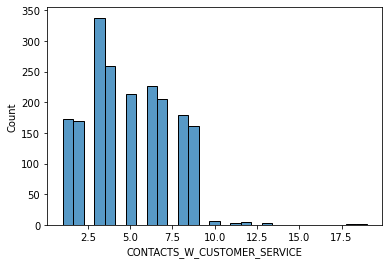

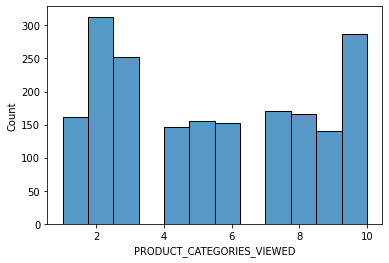

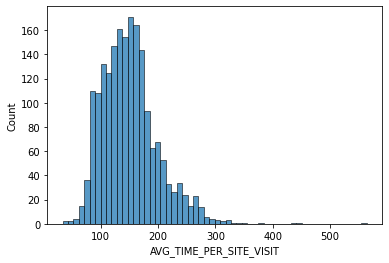

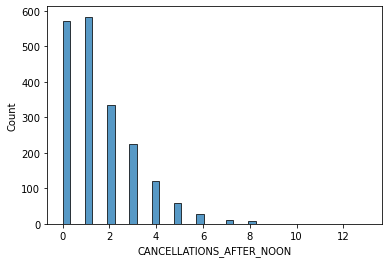

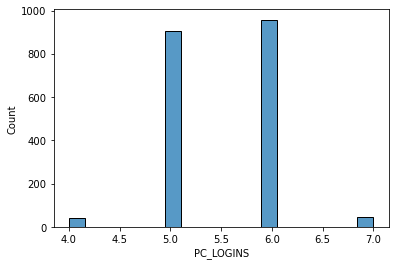

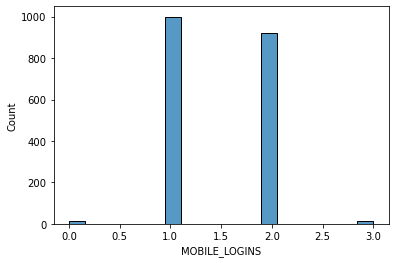

In [3]:
# developing a histogram using HISTPLOT for revenue
sns.histplot(data   = chef,
          x      = 'REVENUE',
          kde    = False) #when true, adds a line if continuous 
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for TOTAL_MEALS_ORDERED
sns.histplot(data   = chef,
          x      = 'TOTAL_MEALS_ORDERED',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for TOTAL_PHOTOS_VIEWED
sns.histplot(data   = chef,
          x      = 'TOTAL_PHOTOS_VIEWED',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for AVG_MEAN_RATING
sns.histplot(data   = chef,
          x      = 'AVG_MEAN_RATING',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for LARGEST_ORDER_SIZE
sns.histplot(data   = chef,
          x      = 'LARGEST_ORDER_SIZE',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for AVG_PREP_VID_TIME
sns.histplot(data   = chef,
          x      = 'AVG_PREP_VID_TIME',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for LATE_DELIVERIES
sns.histplot(data   = chef,
          x      = 'LATE_DELIVERIES',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for WEEKLY_PLAN
sns.histplot(data   = chef,
          x      = 'WEEKLY_PLAN',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for UNIQUE_MEALS_PURCH
sns.histplot(data   = chef,
          x      = 'UNIQUE_MEALS_PURCH',
          kde    = False)  
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for CONTACTS_W_CUSTOMER_SERVICE
sns.histplot(data   = chef,
          x      = 'CONTACTS_W_CUSTOMER_SERVICE',
          kde    = False) 
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for PRODUCT_CATEGORIES_VIEWED
sns.histplot(data   = chef,
          x      = 'PRODUCT_CATEGORIES_VIEWED',
          kde    = False)
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for AVG_TIME_PER_SITE_VISIT
sns.histplot(data   = chef,
          x      = 'AVG_TIME_PER_SITE_VISIT',
          kde    = False) 
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for CANCELLATIONS_AFTER_NOON
sns.histplot(data   = chef,
          x      = 'CANCELLATIONS_AFTER_NOON',
          kde    = False) 
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for PC_LOGINS
sns.histplot(data   = chef,
          x      = 'PC_LOGINS',
          kde    = False) 
# displaying the histogram
plt.show()

######################

# developing a histogram using HISTPLOT for MOBILE_LOGINS
sns.histplot(data   = chef,
          x      = 'MOBILE_LOGINS',
          kde    = False) 
# displaying the histogram
plt.show()


The code is performing feature engineering to enhance the results of the regression analysis. Feature engineering involves creating new features from existing features in the dataset to improve the performance of the regression model.

The code starts by transforming five features that were identified as having a skewed distribution: revenue, total meals ordered, total_photos_viewed, average prep video time, and unique meals purchased. The transformation involves using the log function to normalize the distribution of the variables.

Next, a base model is created using the features that are deemed most impactful on the R-squared value. The method I used to determine the impact of each feature is based on my personal knowledge and understanding of revenue. I decided to focus on the customer experience and ordering history and include the following features in the base model: total photos viewed, average prep video time, and mobile logins. The reasoning behind this selection is based on personal experience and the belief that these features have an impact on revenue. For example, I think that customers use pictures to determine whether to buy a product and that an easy-to-follow meal prep video is important for customers. I also believe that customers are more likely to use their mobile device to login, as the main reason for meal prepping is to save time.

After the base model is created, the code continues with feature engineering to increase the R-squared value. Based on personal knowledge, I believe that average order size, site visits, and total orders impact revenue the most. For this reason, four new features are created using this information. The goal of these new features is to capture additional information that might improve the performance of the regression model and increase the R-squared value.

The first feature I engineered was the time_vs_average, this shows the ratio of average time per site visit compared to the average order size. What I hoped to achieve with this is that the more the customer spends on the site, the more they will order, increasing revenue.

The second feature I engineered was the time_vs_total. This feature shows the comparison of the average time per site visit to the total meals ordered. I hoped to see that the more time spent on the site, the more customers ordered. 

The third feature I engineered was total_vs_average. What this shows is the total meals ordered divided by the largest order size. I wanted to see if more meals ordered per customer meant larger order sizes.

The last engineered feature was total_photos_vs_unique. To be specific, this compares the total photos viewed by the number of unique meals purchased. I felt like this would have a large impact on revenue because I typically base orders, especially foods ones, off of pictures. I felt like the more the customers viewed the photos, the more likely they are to order a unique meal. 

In [4]:
####################### LOG TRANSFORMATIONS############################

# log transforming revenue and saving it to the dataset
chef['log_REVENUE'] = np.log(chef['REVENUE'])

# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])

# log transforming TOTAL_PHOTOS_VIEWED and saving it to the dataset
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'])

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'])

# log transforming UNIQUE_MEALS_PURCH and saving it to the dataset
chef['log_UNIQUE_MEALS_PURCH'] = np.log(chef['UNIQUE_MEALS_PURCH']+ 0.001)

########################### FEATURE ENGINEERING ##########################

# finding the ratio of average time per site visit to average order size 
chef['time_vs_average'] = chef['AVG_TIME_PER_SITE_VISIT'] / chef['LARGEST_ORDER_SIZE']
# finding the ratio of average time per visit to total meals order
chef['time_vs_total'] = chef['AVG_TIME_PER_SITE_VISIT'] / chef['TOTAL_MEALS_ORDERED']
# finding the ratio of total meals ordred to average order size
chef['total_vs_average'] = chef['TOTAL_MEALS_ORDERED'] / chef['LARGEST_ORDER_SIZE']
# finding the ratio of photos viewed to unique meals purchased
chef['total_photos_vs_unique'] = chef['TOTAL_PHOTOS_VIEWED'] / chef['UNIQUE_MEALS_PURCH']

############################### STATS MODEL ##############################

# base model building -- specifying the model type
model1 = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED +
                                    log_TOTAL_PHOTOS_VIEWED + 
                                    AVG_MEAN_RATING +
                                    LARGEST_ORDER_SIZE +
                                    log_AVG_PREP_VID_TIME +
                                    log_UNIQUE_MEALS_PURCH +
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    AVG_TIME_PER_SITE_VISIT + 
                                    MOBILE_LOGINS +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    time_vs_average +
                                    time_vs_total +
                                    total_vs_average +
                                    total_photos_vs_unique
                                    """,
                        data = chef)
# fitting the data to the blueprint 
results = model1.fit()
# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     332.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                -169.70
No. Observations:                1946   AIC:                             369.4
Df Residuals:                    1931   BIC:                             453.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The code is performing regression analysis using scikit-learn to determine which features have the most impact on revenue. Regression analysis is a statistical method used to determine the relationship between a dependent variable (the target or response) and one or more independent variables (predictors or features). In this case, the dependent variable is revenue, and the independent variables are the features that were identified as having the most impact on revenue in the previous step.

The code starts by splitting the data into training and testing sets. The test size is set to 0.25 and a random state of 219 is specified. This means that 25% of the data will be used as the test set, and the remaining 75% will be used as the training set.

Next, the code performs three different types of regression analysis: lasso regression, linear regression, and ridge regression. For each of these regression models, I first fit the model to the training data and then predict the new data. In the case of lasso regression, I used a trial and error method of changing the alpha to increase the output of the R-squared value.

The results of each regression model are then scored and printed. The code concludes by printing the results of all three regression analyses using an f-string. The purpose of these regression analyses is to determine which features have the most impact on revenue and to evaluate the performance of each regression model in predicting the dependent variable.


In [5]:
########################## SCIKIT LEARN ################################
# identify independent variables
x_var = ['log_TOTAL_MEALS_ORDERED', 'log_TOTAL_PHOTOS_VIEWED', 'AVG_MEAN_RATING',
               'LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME', 'log_UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_LOGINS',
               'PRODUCT_CATEGORIES_VIEWED', 'time_vs_average', 'time_vs_total', 
               'total_vs_average', 'total_photos_vs_unique']

# Preparing a DataFrame 
x_data = chef.loc[ : , x_var]

# identify dependent variable
y_data = chef.loc[ : , 'log_REVENUE']

# train/test split up 
x_train, x_test, y_train, y_test = train_test_split(
            x_data, 
            y_data, 
            test_size    = 0.25,
            random_state = 219)

############################ lasso regression ##########################

# set a model name
model_1_name = "Lasso Regression"

# specify a model object 
model_1 = sklearn.linear_model.Lasso(alpha=0.05)
# fit to the training data
model_1_fit = model_1.fit(x_train, y_train)

# predict on new data
model_1_pred = model_1.predict(x_test)

# score the results
model_1_train_score = model_1.score(x_train, y_train).round(4)
model_1_test_score  = model_1.score(x_test, y_test).round(4) 
model_1_gap         = abs(model_1_train_score - model_1_test_score).round(4)

############################ linear regression ##########################

# Set a model name
model_2_name = "Linear Regression"

# Specify a model object 
model_2 = sklearn.linear_model.LinearRegression()

# fit to the training data
model_2_fit = model_2.fit(x_train, y_train)

# predict on new data
model_2_pred = model_2.predict(x_test)

# score the results
model_2_train_score = model_2.score(x_train, y_train).round(4) 
model_2_test_score  = model_2.score(x_test, y_test).round(4)   
model_2_gap         = abs(model_2_train_score - model_2_test_score).round(4)

############################ ARD regression ##########################

# set a model name
model_3_name = "ARD Regression"

# specify a model object 
model_3 = sklearn.linear_model.ARDRegression()

# fit to the training data
model_3_fit = model_3.fit(x_train, y_train)
2
# predict on new data
model_3_pred = model_3.predict(x_test)

# score the results
model_3_train_score = model_3.score(x_train, y_train).round(4)
model_3_test_score  = model_3.score(x_test, y_test).round(4) 
model_3_gap         = abs(model_3_train_score - model_3_test_score).round(4)

############################ Final results ##########################
# printing dynamic results
print(f"""
Winning analysis:                       {model_2_name}
                   ----------------------------------------------------------------
Model Name:       | {model_1_name}\t{model_2_name}\t{model_3_name}
                   ----------------------------------------------------------------
Train Score:      | {model_1_train_score}\t\t{model_2_train_score}\t\t\t{model_3_train_score}
Test Score:       | {model_1_test_score}\t\t{model_2_test_score}\t\t\t{model_3_test_score}
Train Test Gap:   | {model_1_gap}\t\t{model_1_gap}\t\t\t{model_3_gap}
""")



Winning analysis:                       Linear Regression
                   ----------------------------------------------------------------
Model Name:       | Lasso Regression	Linear Regression	ARD Regression
                   ----------------------------------------------------------------
Train Score:      | 0.6436		0.7001			0.6382
Test Score:       | 0.6502		0.7228			0.6478
Train Test Gap:   | 0.0066		0.0066			0.0096

